<a href="https://colab.research.google.com/github/marzia272/AI4ALL_Project/blob/main/AI4ALL_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning, message='divide by zero encountered in log10')

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "S01G1AllChannels.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "wajahat1064/emotion-recognition-using-eeg-and-computer-games",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-3-3010738107>:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 1.79M/1.79M [00:00<00:00, 85.9MB/s]

Extracting zip of S01G1AllChannels.csv...


First 5 records:        AF3      AF4       F3       F4       F7        F8      FC5     FC6  \
0 -33.0205 -15.1846 -42.1795   1.6872  42.1793  -1.68720  -5.5436 -3.6154   
1 -28.6291 -20.0583 -42.5410 -10.4653  35.3100 -15.68600 -19.3110 -2.4344   
2 -21.8497 -10.9006 -32.0346  -2.3656  39.6993  -0.64483  -4.0523 -1.0830   
3 -25.1185 -10.9702 -32.7641  -3.4287  32.7378   4.69650  -8.6299 -1.7412   
4 -19.0316  -9.5886 -29.1108  -3.9459  35.3533   0.79929 -12.6914  1.0144   

        O1       O2       P7       P8       T7       T8  Unnamed: 14  
0  25.7899 -9.88190   5.5436  7.47180  11.8101  17.1128          NaN  
1  17.4933  3.24420  18.7081  5.09510  17.3683   3.0708          NaN  
2  26.8081 -3.45840   8.1861  8.40480  15.1209   9.3940          NaN  
3  16.7637 -9.75860   1.1868  0.91086   4.3315   8.1073          NaN  
4  13.1068 -0.73692   8.1054 -1.31300   8.1694   8.3442          NaN  


In [ ]:
# Check for missing values
missing_summary = df.isnull().sum()
print("Missing values per column:\n", missing_summary)

# Drop columns with excessive missing values (optional)
threshold = 0.5 * len(df)
df = df.loc[:, df.isnull().sum() < threshold]

# Use KNN imputer for remaining missing values
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Replace original with imputed
df = df_imputed


Missing values per column:
 AF3                0
AF4                0
F3                 0
F4                 0
F7                 0
F8                 0
FC5                0
FC6                0
O1                 0
O2                 0
P7                 0
P8                 0
T7                 0
T8                 0
Unnamed: 14    38252
dtype: int64


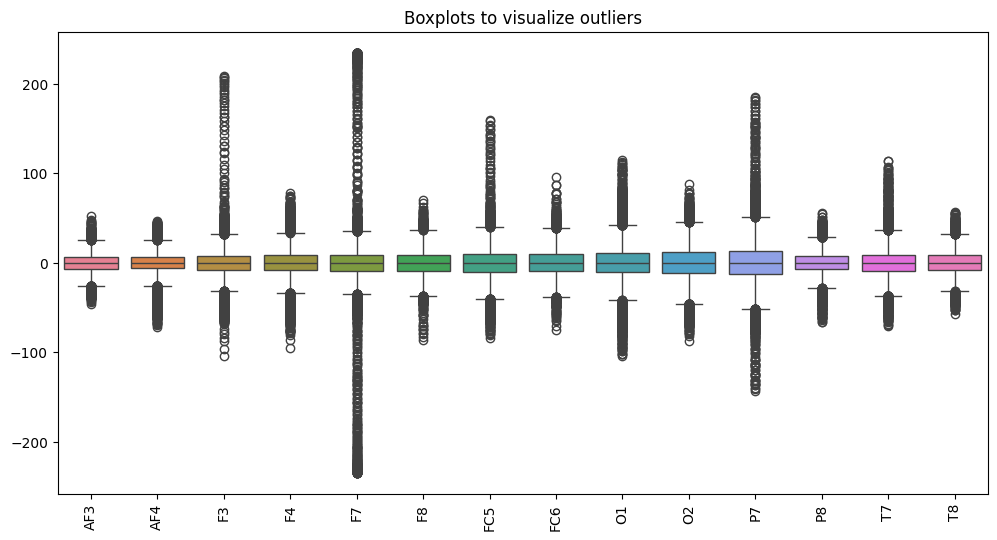

In [ ]:
# Visualize distributions to find outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplots to visualize outliers")
plt.show()

# Optionally: remove rows with outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
# Check for object or categorical columns
print("Non-numeric columns:", df.select_dtypes(include=['object', 'category']).columns)

# If any categorical columns are present, encode them
# Example: df['Emotion'] = df['Emotion'].map({'Happy': 0, 'Sad': 1, 'Angry': 2, ...})
# Or use one-hot encoding:
# df = pd.get_dummies(df, drop_first=True)


Non-numeric columns: Index([], dtype='object')


In [ ]:
# Example: mean signal per row (across channels)
df['Signal_Mean'] = df.mean(axis=1)
df['Signal_Std'] = df.std(axis=1)

# Optional: Feature interaction
df['Mean_to_Std_Ratio'] = df['Signal_Mean'] / (df['Signal_Std'] + 1e-5)


In [ ]:
print("Shape after all prep:", df.shape)
print(df.head())


Shape after all prep: (31118, 17)
        AF3      AF4       F3        F4       F7       F8      FC5      FC6  \
6  -23.6760 -14.1752 -28.8991 -7.859200  21.1970 -13.1670 -16.7239  2.28940   
7  -18.6401  -8.2630 -18.7293 -0.397740  26.9148   1.7230  -3.9101 -1.46320   
8  -15.5935  -5.8390 -12.7851  1.554300  25.7818   5.2348  -2.2297 -3.78550   
9   -9.3552  -6.9349  -8.6437  0.014801  24.2349  -2.7921  -4.0241  0.29799   
10 -11.9274  -5.7957  -5.9555  3.629600  23.0220   3.8832   4.6532 -7.67390   

         O1        O2       P7      P8       T7       T8  Signal_Mean  \
6   11.3447  -0.16409  10.3773  3.5687   8.9199   4.6974    -3.019292   
7   15.7259  -9.55450   4.6932  1.1857   7.6616   7.0669     0.286654   
8   12.8541  -5.12480  -3.3012  0.1502   3.8279   8.0891     0.630957   
9   12.0824   4.34170   7.9841 -1.3051  10.3467   5.1932     2.245764   
10   9.1886 -10.01880  -3.3410 -6.2882   5.6288  10.9074     0.708021   

    Signal_Std  Mean_to_Std_Ratio  
6    14.114796  